In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = sns.load_dataset('titanic')

# Initial check
print(df.info())
print(df.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
          survived      pclass   sex         age       sibsp       parch  

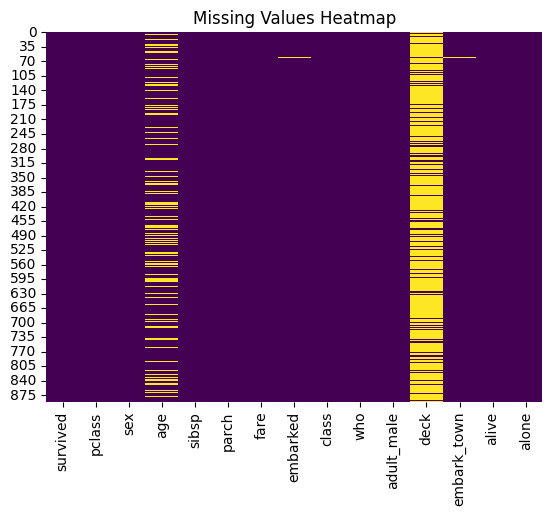

In [3]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


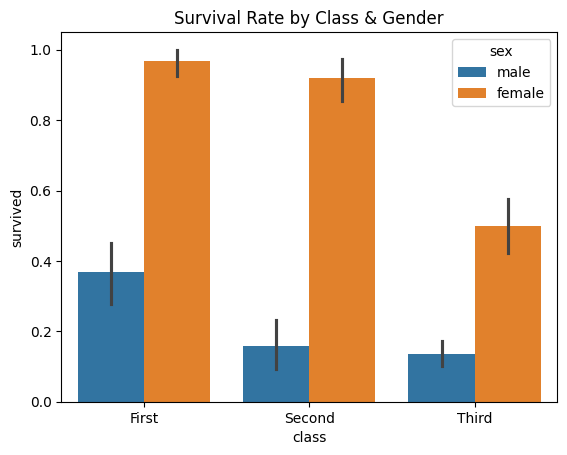

In [4]:
sns.barplot(data=df, x='class', y='survived', hue='sex')
plt.title('Survival Rate by Class & Gender')
plt.show()


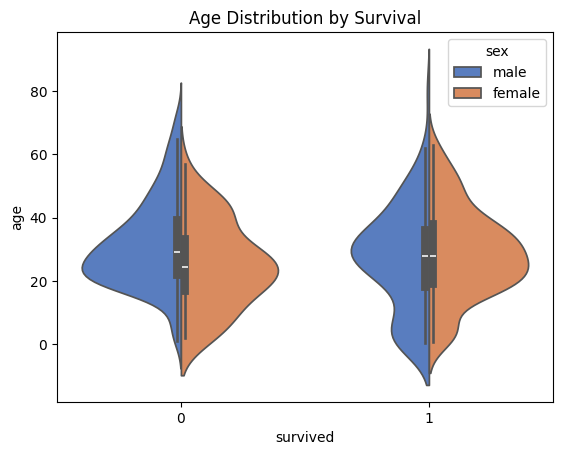

In [5]:
sns.violinplot(data=df, x='survived', y='age', hue='sex', split=True, palette='muted')
plt.title('Age Distribution by Survival')
plt.show()


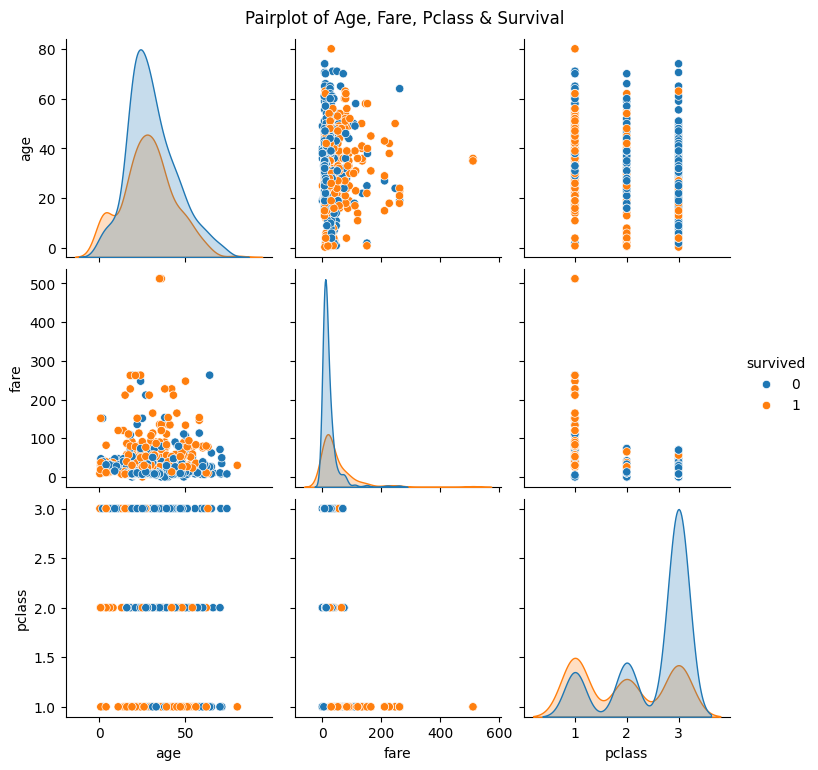

In [6]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.suptitle('Pairplot of Age, Fare, Pclass & Survival', y=1.02)
plt.show()


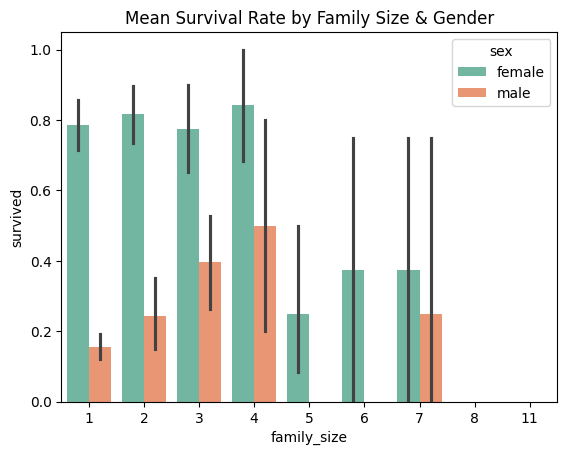

In [9]:
sns.barplot(data=df, x='family_size', y='survived', hue='sex', palette='Set2')
plt.title('Mean Survival Rate by Family Size & Gender')
plt.show()


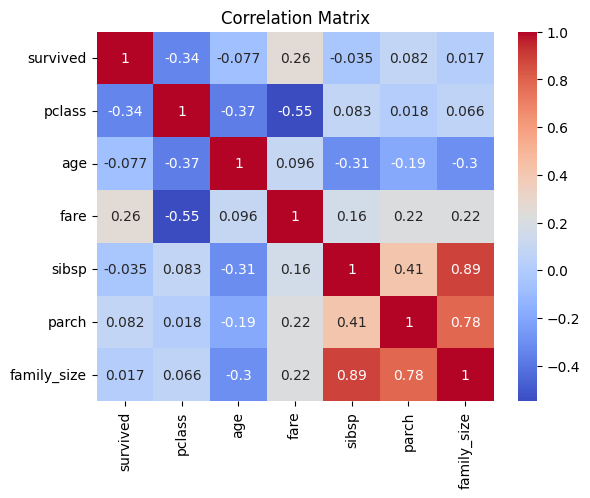

In [10]:
corr = df[['survived', 'pclass', 'age', 'fare', 'sibsp', 'parch', 'family_size']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


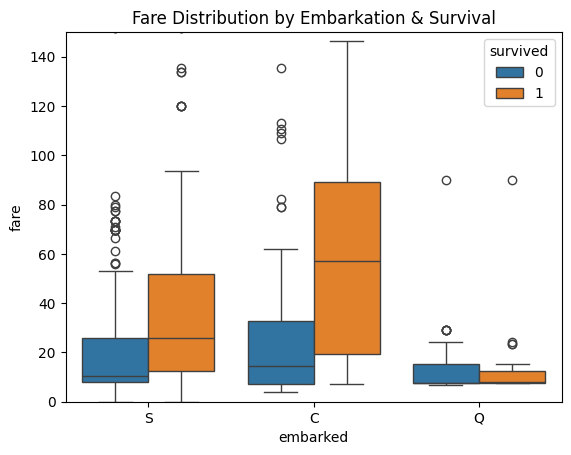

In [17]:
sns.boxplot(data=df, x='embarked', y='fare', hue='survived')
plt.title('Fare Distribution by Embarkation & Survival')
plt.ylim(0, 150)  
plt.show()


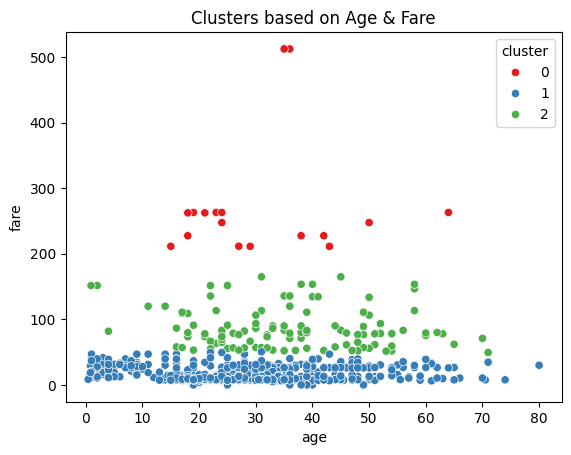

In [12]:
from sklearn.cluster import KMeans

# Drop NaNs for clustering
X = df[['age', 'fare']].dropna()

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Add cluster label
X['cluster'] = kmeans.labels_

# Plot clusters
sns.scatterplot(data=X, x='age', y='fare', hue='cluster', palette='Set1')
plt.title('Clusters based on Age & Fare')
plt.show()


🟢 Women had much higher survival rates across all classes.

🔵 First-class passengers had the highest survival probability (over 60%).

🟠 Small families (2–4 members) showed better survival than solo travelers or large families.

🟡 Fare and age have clusters that roughly separate survival likelihoods.

🔴 The embarkation point appears linked to ticket fare distributions.